# IMDb Movies Data Analysis using Python
### Content:
- Exploring Dataset:
1. Importing Libraries
2. Importing the dataset, loading in dataframe 
3. Studying the structure of the dataset
- Data Preprocessing:
1. Checking NULL Values
2. Filling NULL Values
3. Checking Duplicates
- Data Analysis:
1. Movies per Genre
2. Heatmap
3. Word Cloud for Directors
4. Scatter Plot of Revenue vs. Rating
5. Movies per Director
6. Distribution of Movie Ratings
7. Word cloud of actors
- Time Series Analysis:
1. Times Series Analysis of Movies over Year
2. Time Series Analysis of Average Rating Over Years
3. Time Series Analysis of Revenue Over Years
- Predictive Modeling using Machine Learning Algorithms:
1. For Movie Revenue (Linear Regression)
2. For movie rating category- High/Low (Random Forest)

## Importing Libraries

In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

In [6]:
import missingno as msno

In [7]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [8]:
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [9]:
df = pd.read_csv("IMDB-Movie-Data.csv")

## Exploring the dataset

In [10]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [11]:
df.set_index('Title', inplace=True)
df.head(10)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


In [12]:
df.shape

(1000, 11)

In [13]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 1000
Number of columns: 11


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [15]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Data Preprocessing

### 1. Checking NULL Values

In [16]:
df.isnull().sum()

Rank                    0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

This matrix provides a visual representation of the missing data pattern in the dataframe, helping to identify any patterns or correlations in the missing values across different columns.

<Axes: >

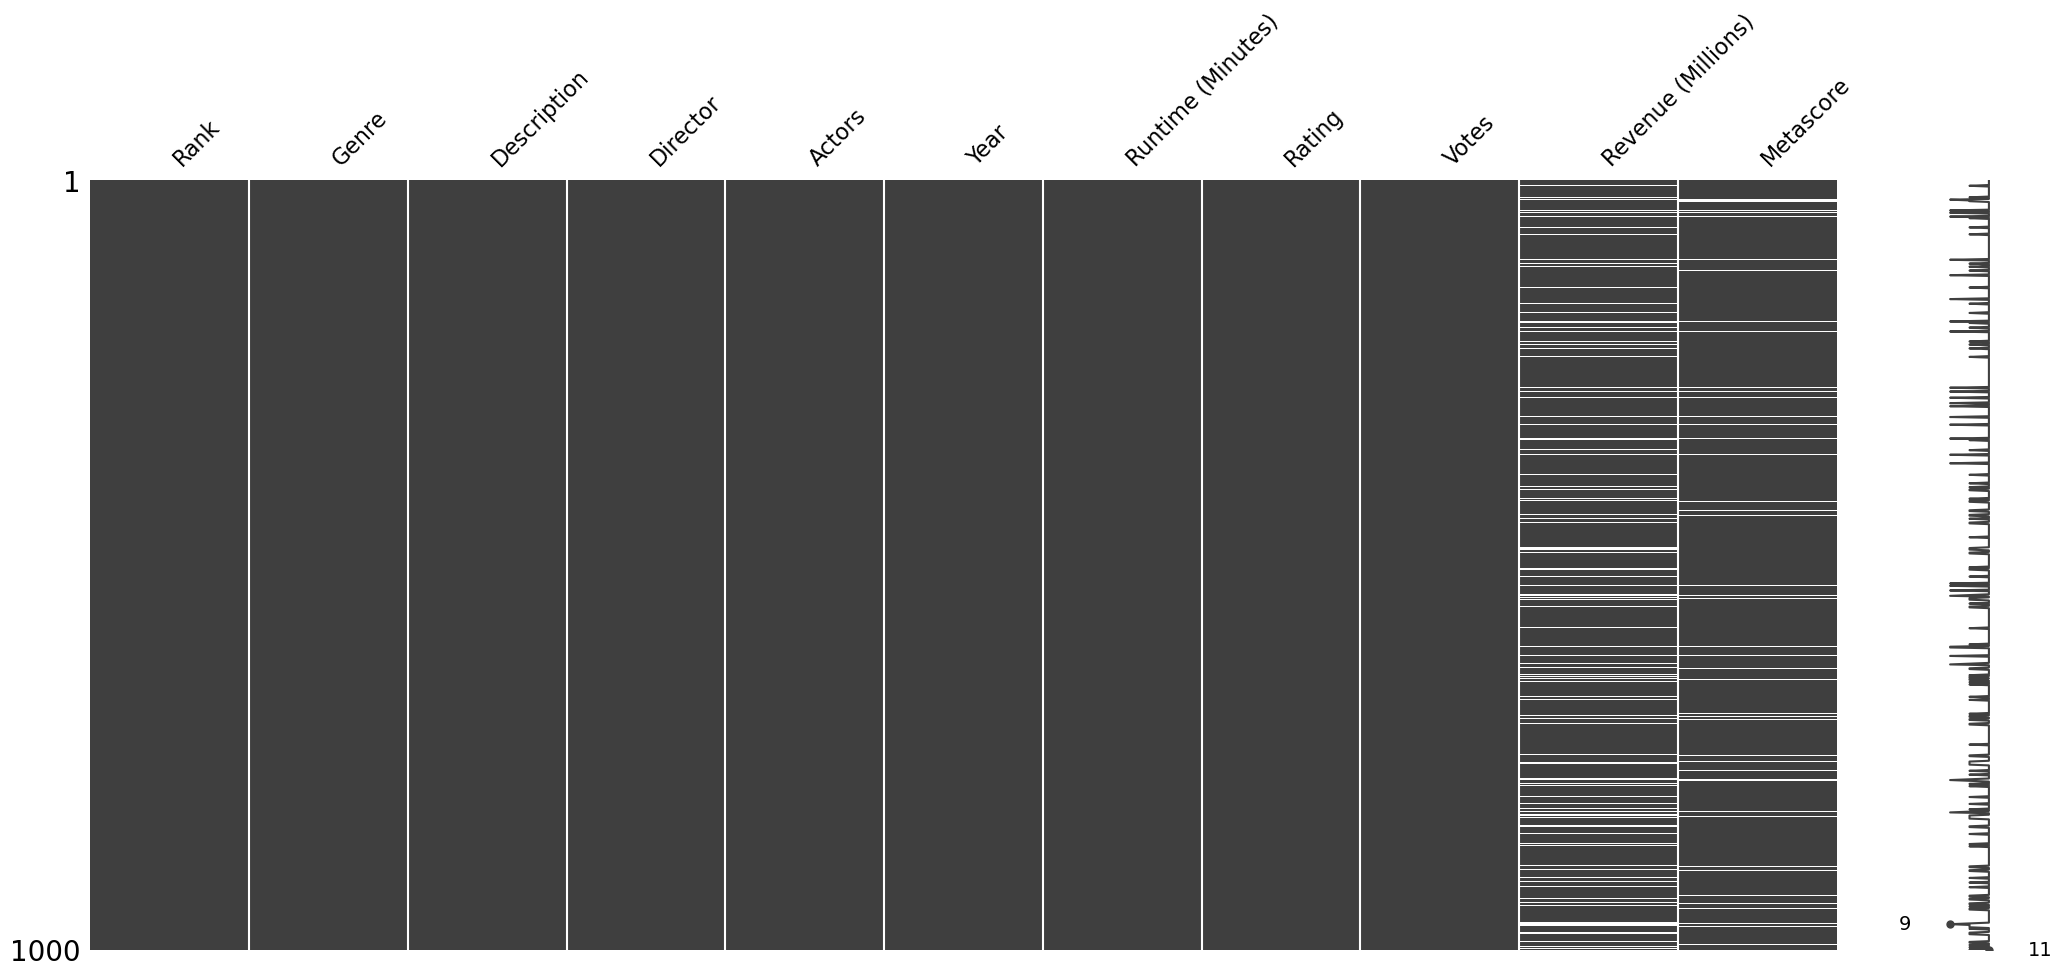

In [17]:
msno.matrix(df)

### 2. Replacing NULL values with mean

In [18]:
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean(), inplace=True)

In [19]:
df.isnull().sum()

Rank                   0
Genre                  0
Description            0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue (Millions)     0
Metascore             64
dtype: int64

### 3. Checking Duplicates

In [20]:
df[df.duplicated()]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,


## Data Analysis

### 1. Movies per Genre

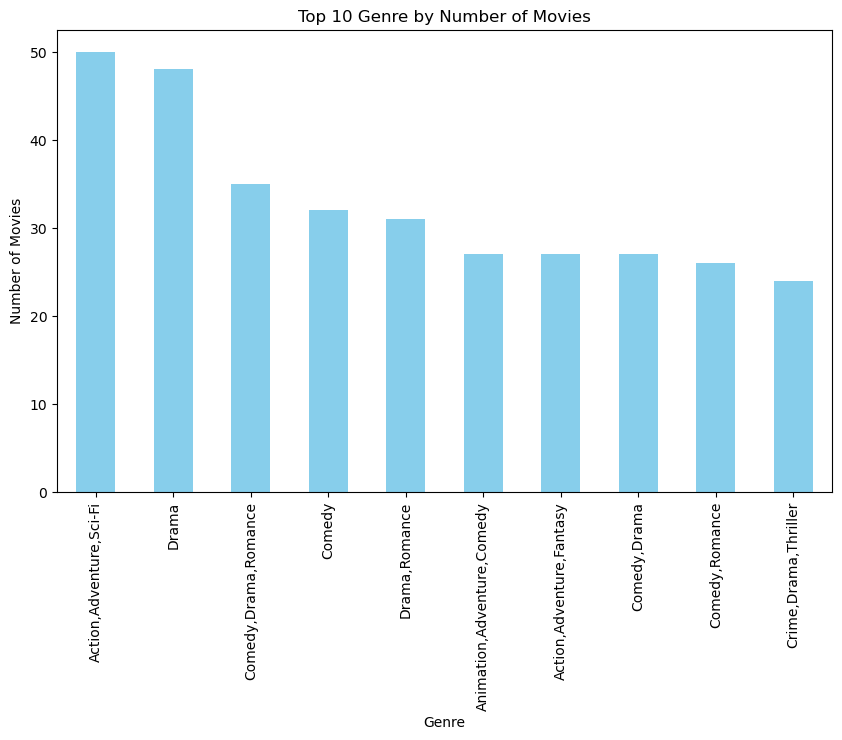

In [21]:
top_10_genres = df['Genre'].value_counts().nlargest(10)
plt.figure(figsize = (10, 6))
top_10_genres.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Genre by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 90)
plt.show()

### 2. Heatmap

<Axes: >

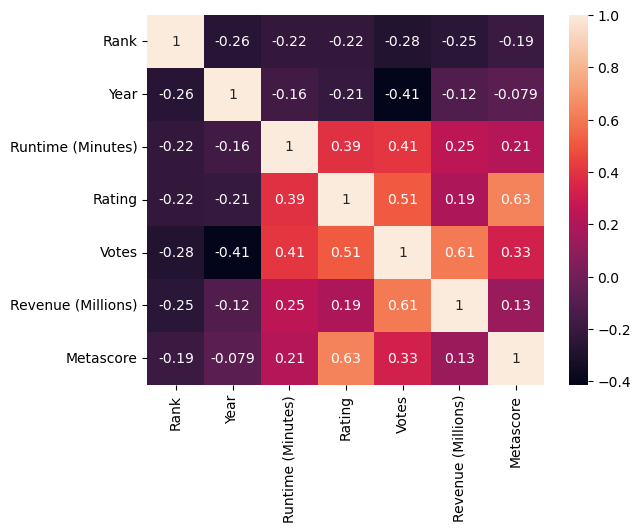

In [22]:
sns.heatmap(df.corr(),annot=True)

### 3. Word Cloud for Directors

In [23]:
text = ''
for i in df.Director:
    value  = i
    value = value.strip()
    value = value.replace(" ","_")
    text = text + " " + value
    
text = text.strip()

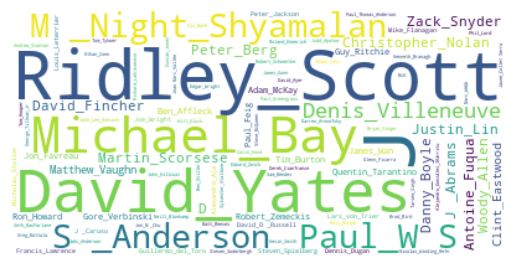

In [24]:
wordcloud =  WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Stopwords from Description

In [25]:
text = ''
for i in df.sort_values(by='Revenue (Millions)').Description:
    value  = i
    value = value.strip()
#     value = value.replace(" ","_")
    text = text + " " + value
    
text = text.strip()

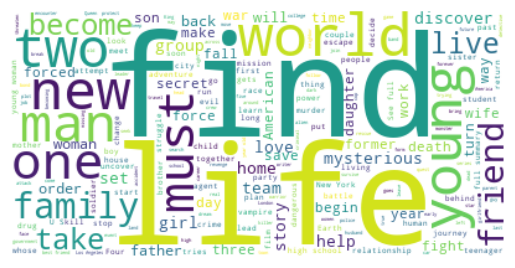

In [26]:
wordcloud =  WordCloud(stopwords=stopwords, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### 4. Scatter Plot of Revenue vs. Rating

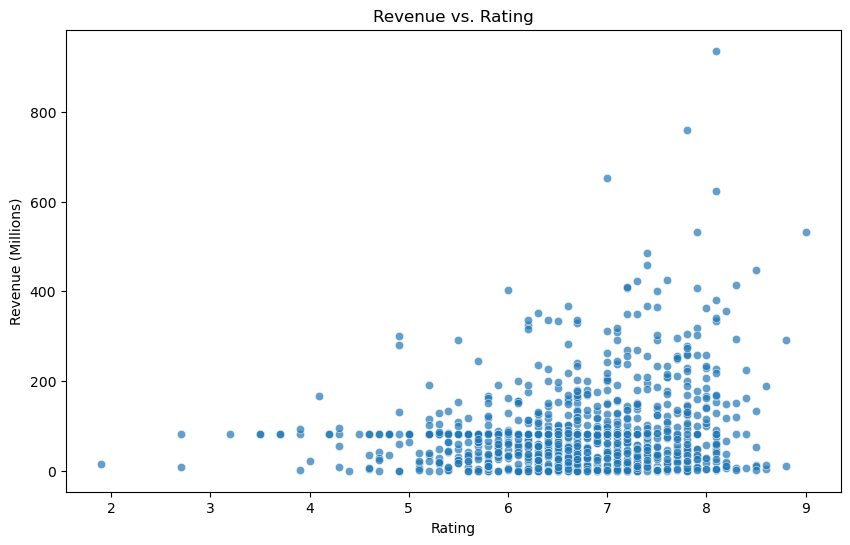

In [27]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x='Rating', y='Revenue (Millions)', data = df, alpha = 0.7)
plt.title('Revenue vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.show()

### 5. Movies per Director

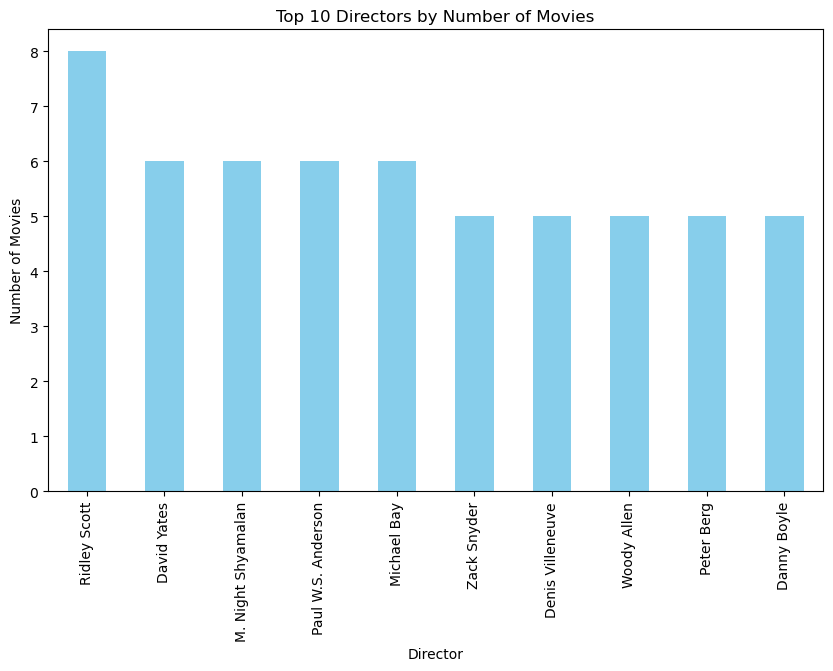

In [28]:
top_directors = df['Director'].value_counts().nlargest(10)
plt.figure(figsize = (10, 6))
top_directors.plot(kind ='bar', color = 'skyblue')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 90)
plt.show()

### 6. Distribution of Movie Ratings

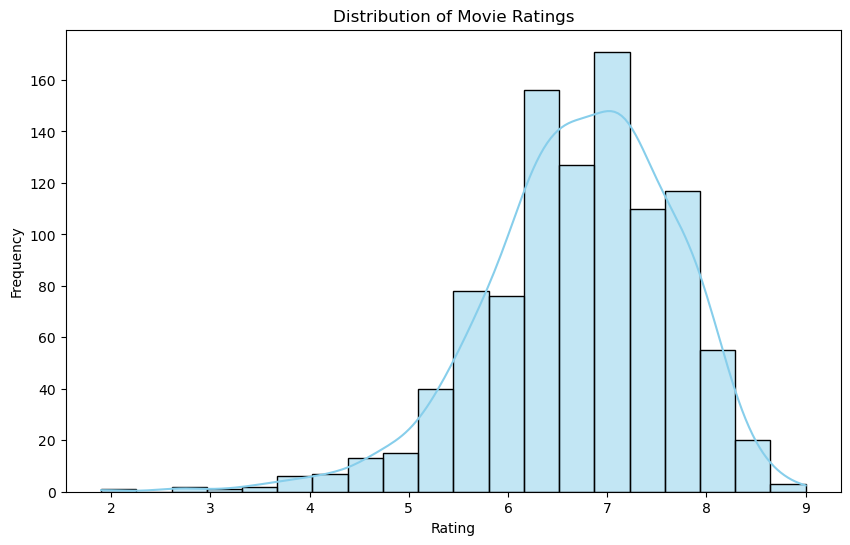

In [29]:
plt.figure(figsize = (10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 7. Word Cloud of Actors

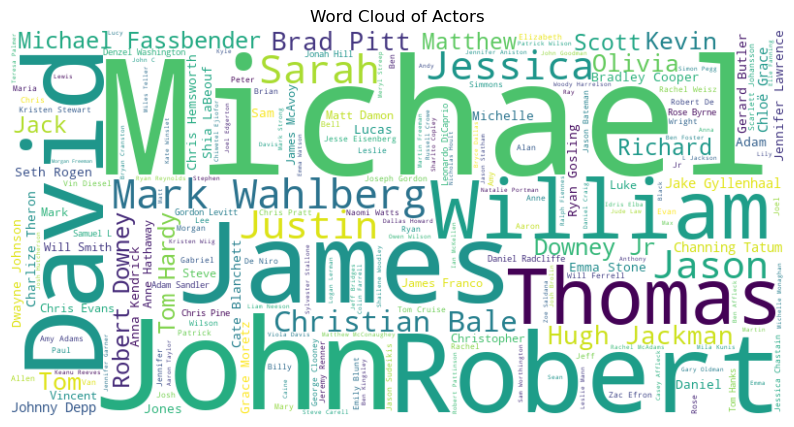

In [30]:
actors_text = ' '.join(df['Actors'].str.replace(',','').values)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(actors_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Actors')
plt.axis('off')
plt.show()

## Time Series Analysis

### 1. Times Series Analysis of Movies over Years

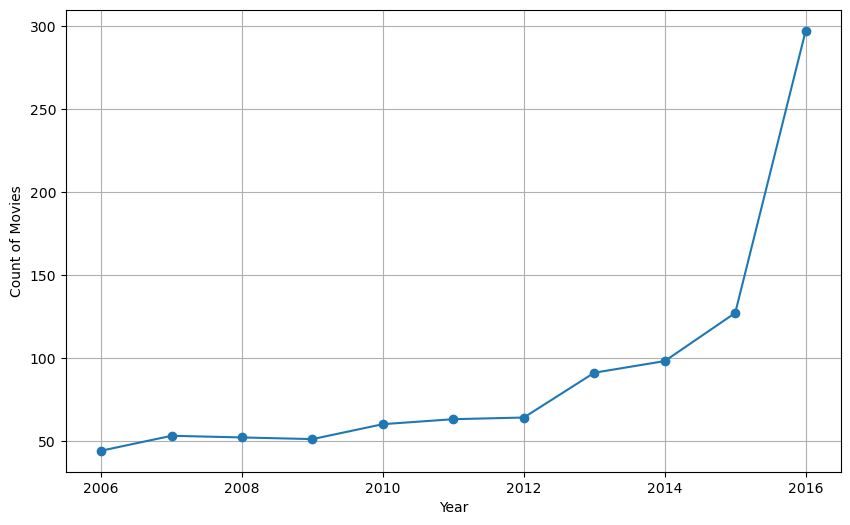

In [31]:
movie_over_years = df.Year.value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.plot(movie_over_years,marker = "o")
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.grid(True)
plt.show()

### 2. Time Series Analysis of Average Rating Over Years

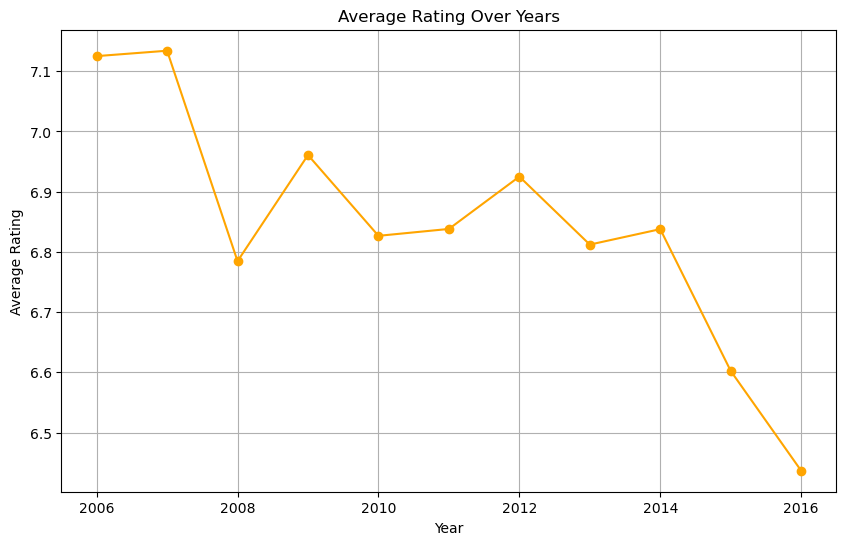

In [32]:
ratings_over_years = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 6))
ratings_over_years.plot(marker='o', color = 'orange')
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### 3. Time Series Analysis of Revenue Over Years

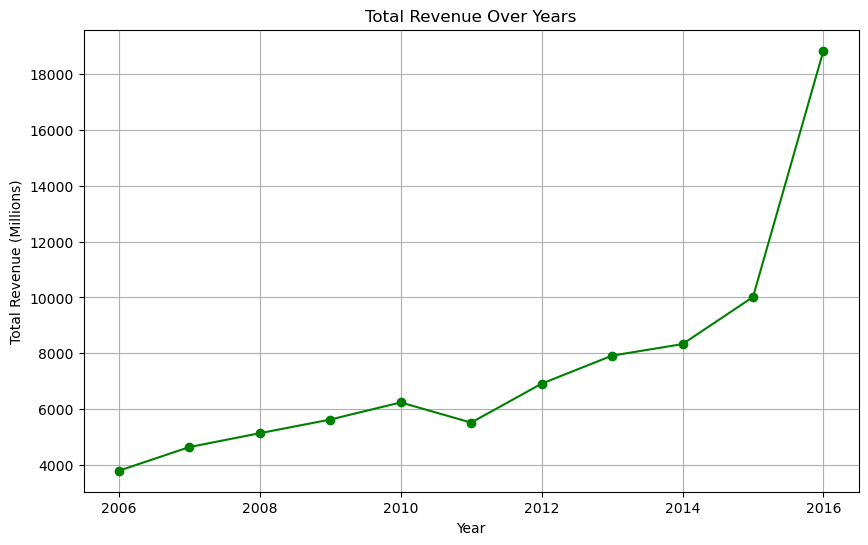

In [33]:
revenue_over_years = df.groupby('Year')['Revenue (Millions)'].sum()
plt.figure(figsize=(10, 6))
revenue_over_years.plot(marker='o', color='green')
plt.title('Total Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions)')
plt.grid(True)
plt.show()

## Predictive Modeling using Machine Learning Algorithms

### 1. For Movie Revenue (Linear Regression)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
#feature selection
features = ['Rating', 'Runtime (Minutes)', 'Metascore', 'Year']
X = df[features].fillna(0) 
y = df['Revenue (Millions)'].fillna(0)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predictions using model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#evaluation of the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 92.69644846330326
Test RMSE: 91.86734052533824


### 2. For Movie Rating Category- High/Low (Random Forest)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [37]:
# Define rating categories with a threshold
rating_threshold = df['Rating'].quantile(0.75) 
df['Rating_Category'] = df['Rating'].apply(lambda x: 'High' if x >= rating_threshold else 'Low')

# Feature Engineering
features = ['Genre', 'Director', 'Actors', 'Runtime (Minutes)', 'Year']
X = df[features]
y = df['Rating_Category']

# Data Preprocessing
# Encode categorical features
label_encoders = {}
for column in ['Genre', 'Director', 'Actors']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Handle missing values
X.fillna(0, inplace=True)

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

        High       0.66      0.44      0.53        48
         Low       0.84      0.93      0.88       152

    accuracy                           0.81       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.80      0.81      0.80       200

